In [27]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, fixed
from IPython.display import display

%matplotlib inline

wave = thinkdsp.read_wave('384586__eardeer__banshee.wav')
wave.normalize()
wave.make_audio()

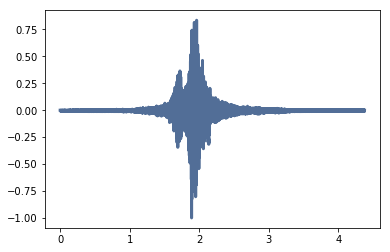

In [29]:
wave.plot()

In [31]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

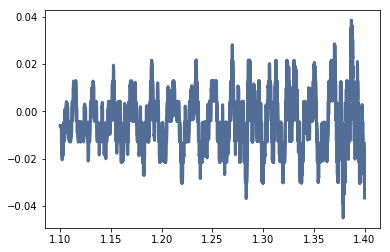

In [33]:
segment.plot()

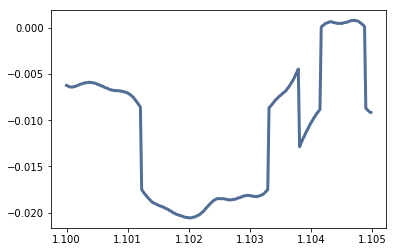

In [35]:
segment.segment(start=1.1, duration=0.005).plot()

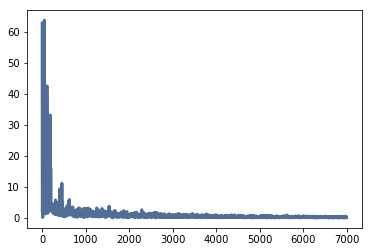

In [37]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

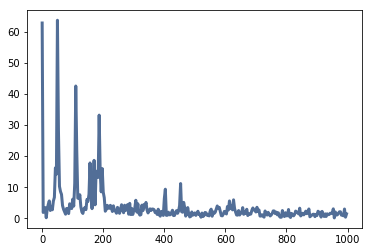

In [39]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

In [41]:
spectrum.peaks()[:30]

[(63.704179880452422, 50.0),
 (62.811332437890243, 0.0),
 (42.549791827936708, 110.0),
 (33.18702476805661, 186.66666666666669),
 (28.04208590911729, 53.333333333333336),
 (21.516747134009538, 113.33333333333334),
 (18.636201292778644, 170.0),
 (17.804305689063227, 156.66666666666669),
 (16.22735323218097, 43.333333333333336),
 (15.998601455129252, 196.66666666666669),
 (15.145152735607711, 176.66666666666669),
 (14.88176690919893, 190.0),
 (14.720653716244559, 180.0),
 (14.2009481777229, 46.666666666666671),
 (13.138917982292146, 183.33333333333334),
 (11.257326579540306, 106.66666666666667),
 (11.174408946827015, 453.33333333333337),
 (10.274275084196971, 56.666666666666671),
 (9.7746049143074227, 166.66666666666669),
 (9.3587493446458065, 403.33333333333337),
 (8.6018978033734612, 60.0),
 (8.501221337969552, 193.33333333333334),
 (8.3982004337476237, 200.0),
 (8.0022341819092926, 160.0),
 (7.7536314724169122, 153.33333333333334),
 (7.6836842734485469, 63.333333333333336),
 (7.562826

In [43]:
spectrum.make_wave().make_audio()

In [44]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    thinkplot.config(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

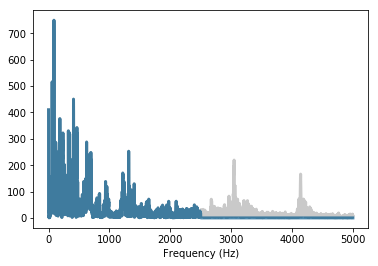

In [45]:
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));